In [1]:
from LRL import *

In [2]:
USE_CUDA

True

# Cartpole task

In [3]:
env = gym.make('CartPole-v0')

In [4]:
class CartpoleNN(nn.Module):
    def __init__(self, linear):
        super().__init__()
        
        self.layers = nn.Sequential(
                        linear(4, 128),
                        nn.ReLU(),
                        linear(128, 128),
                        nn.ReLU())
        
    def forward(self, x):
        return self.layers(x)

# Store experiment results

In [5]:
import time
import pandas as pd
results = pd.DataFrame(columns=["Reached 200", "Average reward", "FPS"])

curves = {}
episode_length = {}
time = {}

In [6]:
def store_res(name, agent):
    agent.save("Models/cartpole_" + name)
    
    curves[name] = agent.logger["rewards"]
    episode_length[name] = agent.logger["episode ends"]
    time[name] = agent.logger["fps"]
    
    perfect = np.nonzero(np.array(agent.logger["rewards"]) == 200)[0]
    
    results.loc[name] = [perfect[0] if len(perfect) > 0 else None,
                         np.array(agent.logger["rewards"]).mean(),
                         1 / np.mean(1 / np.array(agent.logger["fps"]))]

## Classic DQN

In [7]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [8]:
agent = eGreedy(TargetQAgent(QAgent(ReplayBufferAgent)))(config)

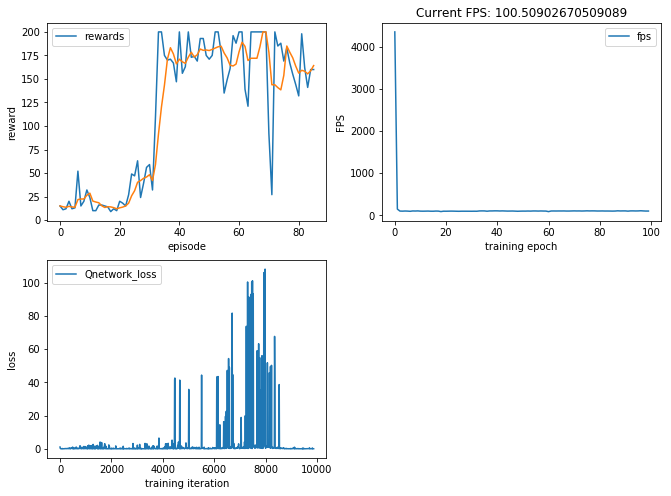

In [9]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [10]:
store_res("DQN", agent)

## Twin DQN

In [11]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [12]:
agent = eGreedy(TwinQAgent(QAgent(ReplayBufferAgent)))(config)

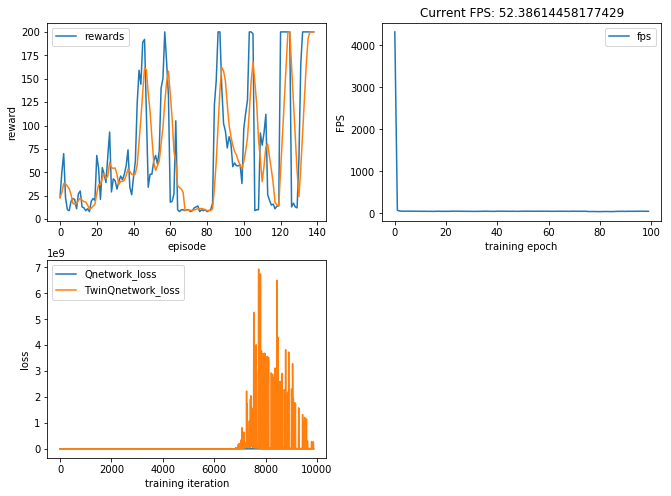

In [13]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [14]:
store_res("TwinDQN", agent)

## Backwards DQN

In [15]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_games_capacity": 50,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [16]:
agent = eGreedy(QAgent(BackwardBufferAgent))(config)

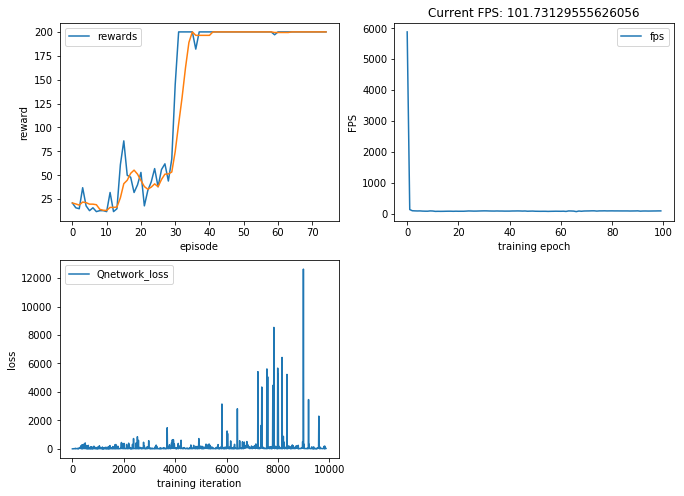

In [17]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [18]:
store_res("Backwards DQN", agent)

## Double DQN

In [19]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [20]:
agent = eGreedy(DoubleQAgent(QAgent(ReplayBufferAgent)))(config)

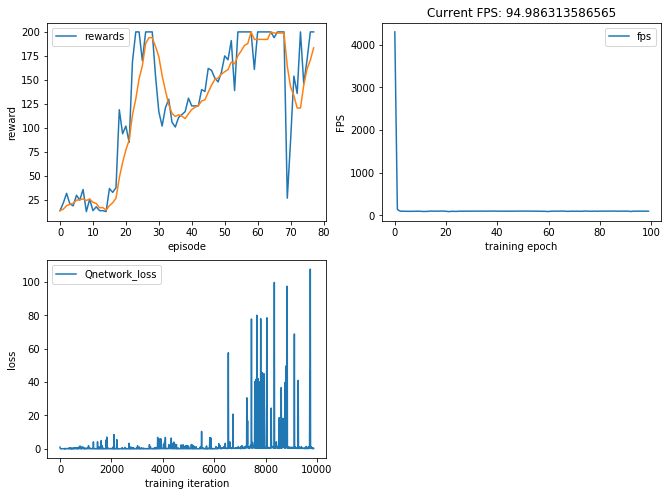

In [21]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [22]:
store_res("Double DQN", agent)

## Dueling Double DQN

In [23]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingQnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [24]:
agent = eGreedy(DoubleQAgent(QAgent(ReplayBufferAgent)))(config)

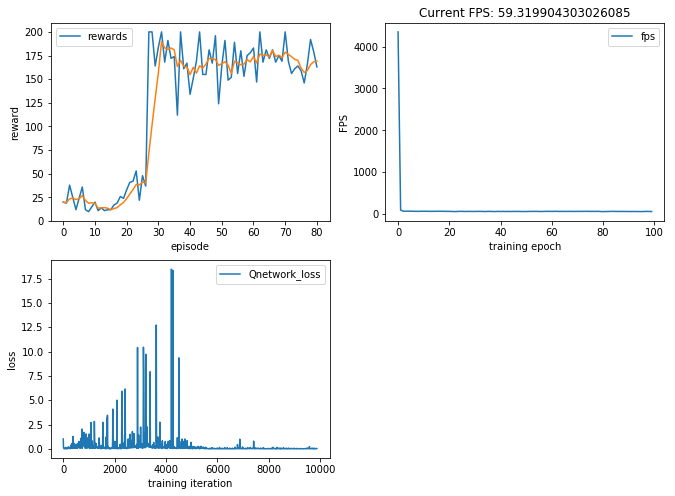

In [25]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [26]:
store_res("Dueling Double DQN", agent)

## Double DQN + Prioritized

In [27]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 100
}

In [28]:
agent = eGreedy(DoubleQAgent(QAgent(PrioritizedBufferAgent)))(config)

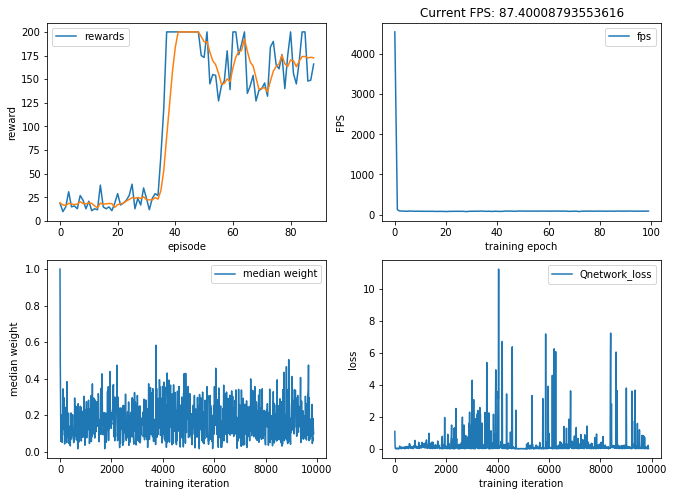

In [29]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [30]:
store_res("Prioritized Double DQN", agent)

## Noisy Double DQN

In [31]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "Qnetwork_linear": NoisyLinear(std_init=0.4),
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000
}

In [32]:
agent = DoubleQAgent(QAgent(ReplayBufferAgent))(config)

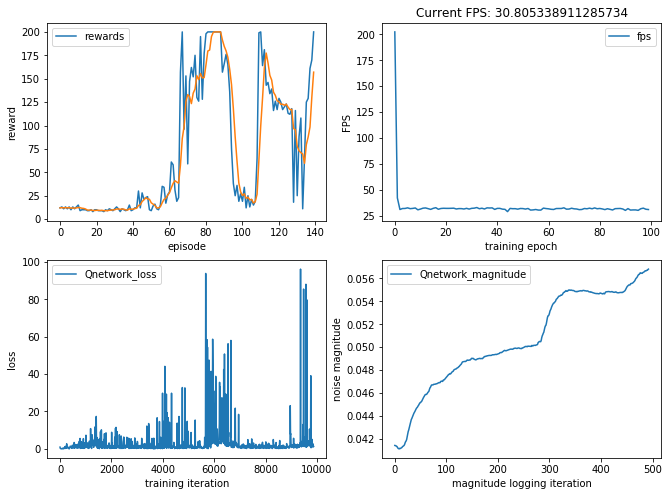

In [33]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [34]:
store_res("Noisy Double DQN", agent)

## NoisyNet + Double DQN + Prioritized

In [35]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "Qnetwork_linear": NoisyLinear(std_init=0.4),
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 100
}

In [36]:
agent = DoubleQAgent(QAgent(PrioritizedBufferAgent))(config)

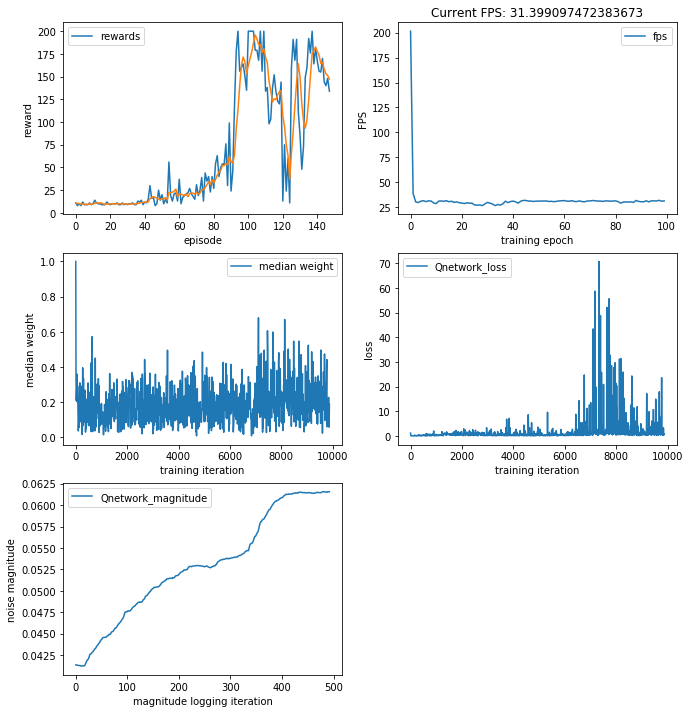

In [37]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [38]:
store_res("Noisy Prioritized Double DQN", agent)

## Dueling + NoisyNet + Double DQN + Prioritized

In [39]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingQnetwork,
    "Qnetwork_linear": NoisyLinear(std_init=0.4),
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 100
}

In [40]:
agent = DoubleQAgent(QAgent(PrioritizedBufferAgent))(config)

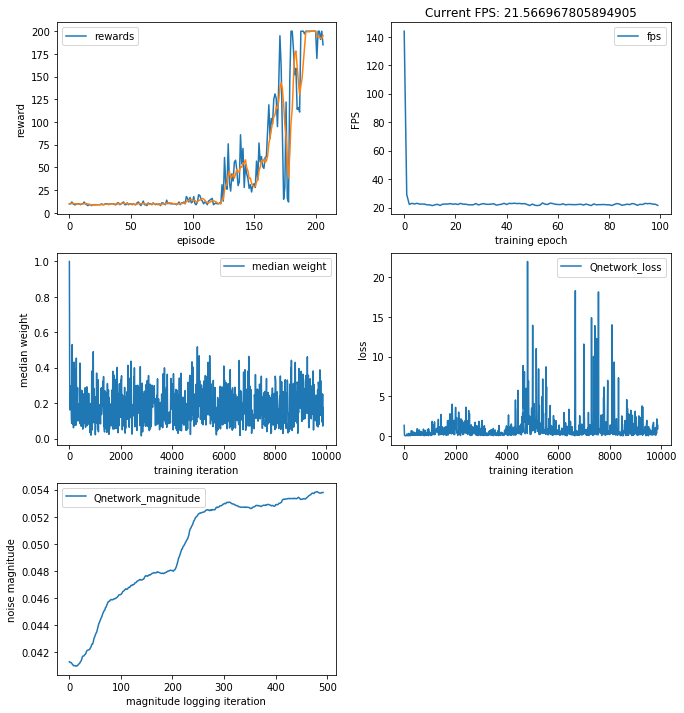

In [41]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [42]:
store_res("Noisy Prioritized Dueling Double DQN", agent)

# Categorical

In [43]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [44]:
agent = eGreedy(CategoricalQAgent(ReplayBufferAgent))(config)

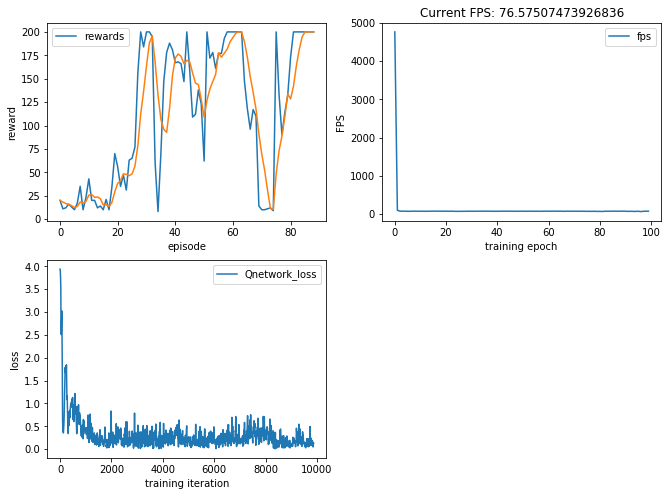

In [45]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [46]:
store_res("Categorical DQN", agent)

# Categorical Backwards

In [47]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_games_capacity": 50,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [48]:
agent = eGreedy(CategoricalQAgent(BackwardBufferAgent))(config)

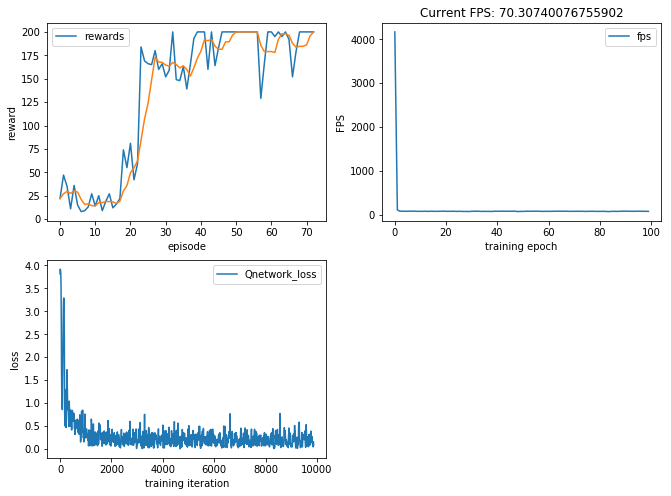

In [49]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [50]:
store_res("Categorical Backwards DQN", agent)

# Categorical + Target

In [51]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [52]:
agent = eGreedy(TargetQAgent(CategoricalQAgent(ReplayBufferAgent)))(config)

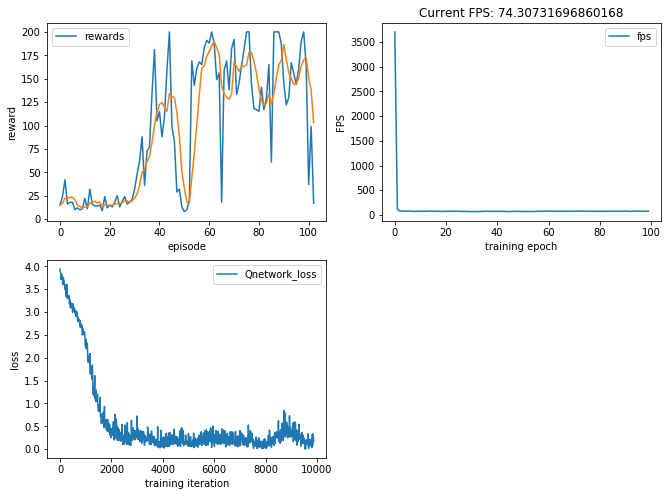

In [53]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [54]:
store_res("Categorical DQN with target network", agent)

# Categorical + Double

In [55]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [56]:
agent = eGreedy(DoubleQAgent(CategoricalQAgent(ReplayBufferAgent)))(config)

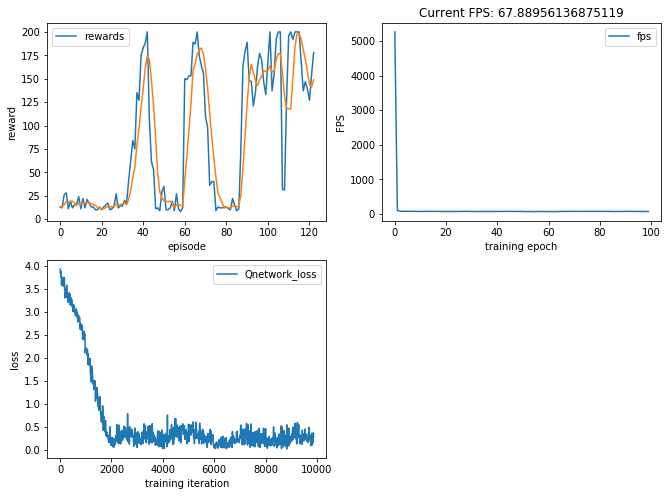

In [57]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [58]:
store_res("Categorical Double DQN", agent)

# Categorical + Double + PrioritizedReplayBuffer

In [59]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,    
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [60]:
agent = eGreedy(DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent)))(config)

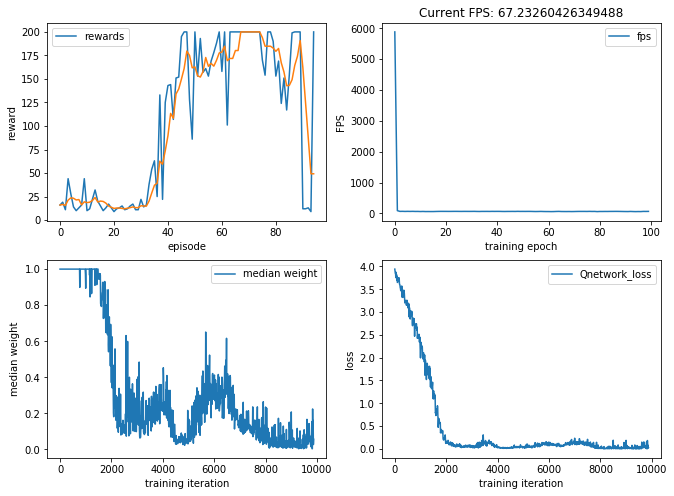

In [61]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [62]:
store_res("Categorical Prioritized Double DQN", agent)

# Categorical + Double + PrioritizedReplayBuffer + Noisy

In [63]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "Qnetwork_linear": NoisyLinear(std_init=0.4),
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [64]:
agent = DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent))(config)

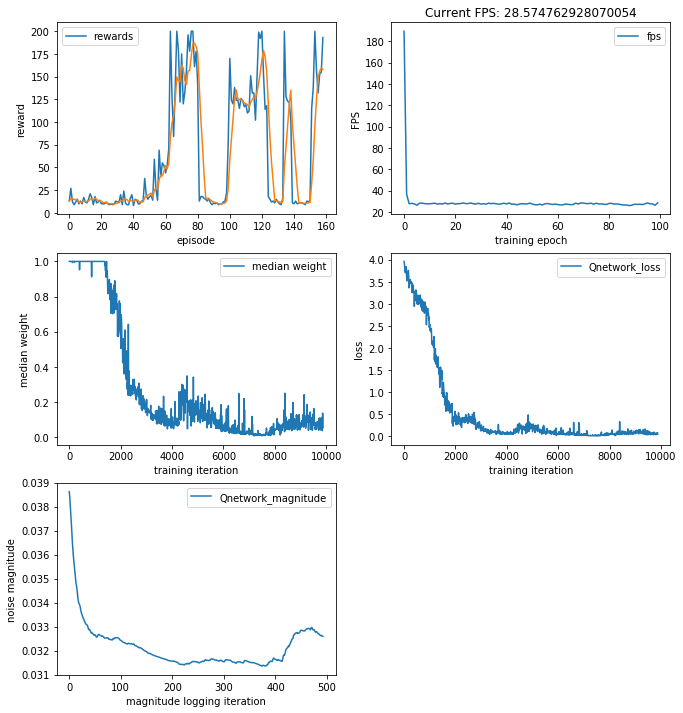

In [65]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [66]:
store_res("Noisy Categorical Prioritized Double DQN", agent)

# Categorical + Double + PrioritizedReplayBuffer + Noisy + Dueling

In [67]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingCategoricalQnetwork,
    "Qnetwork_linear": NoisyLinear(std_init=0.4),
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [68]:
agent = DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent))(config)

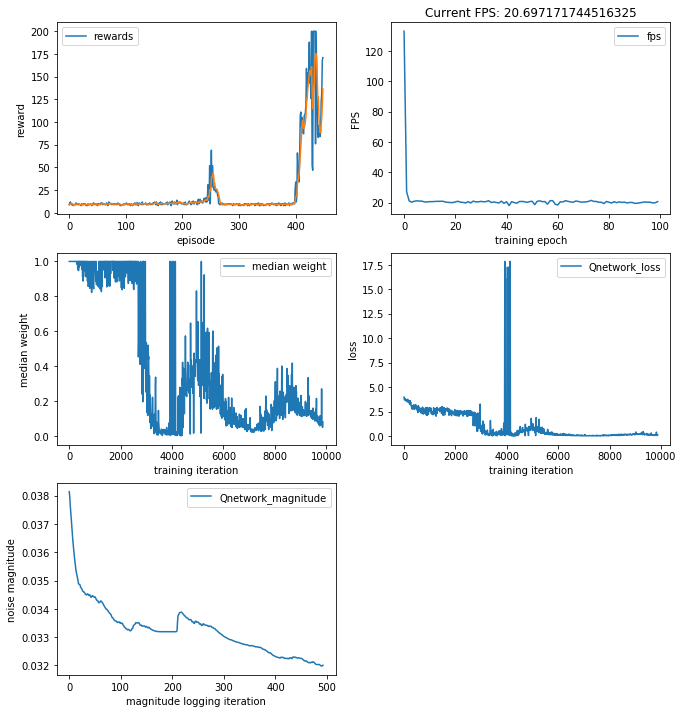

In [69]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [70]:
store_res("Noisy Categorical Prioritized Dueling Double DQN", agent)

# Rainbow

In [71]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingCategoricalQnetwork,
    "Qnetwork_linear": NoisyLinear(std_init=0.4),
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_nsteps": 2,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [72]:
agent = DoubleQAgent(CategoricalQAgent(NstepReplay(PrioritizedBufferAgent)))(config)

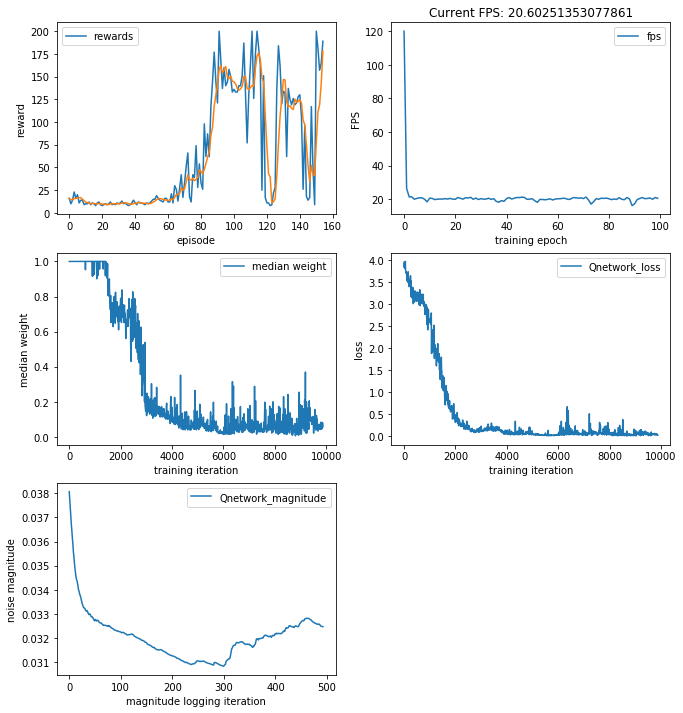

In [73]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [74]:
store_res("Rainbow", agent)

# QR-DQN

In [75]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "quantiles": 51
}

In [76]:
agent = eGreedy(DoubleQAgent(QuantileQAgent(ReplayBufferAgent)))(config)

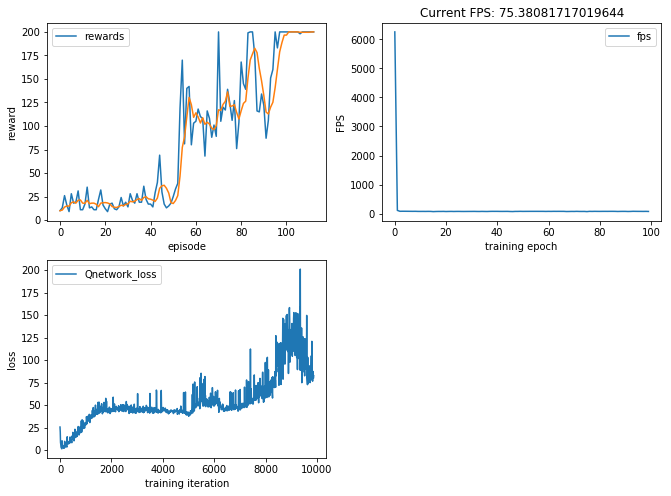

In [77]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [78]:
store_res("Quantile Regression DQN", agent)

# QR Backwards

In [79]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": QuantileQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_games_capacity": 50,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "quantiles": 51
}

In [80]:
agent = eGreedy(QuantileQAgent(BackwardBufferAgent))(config)

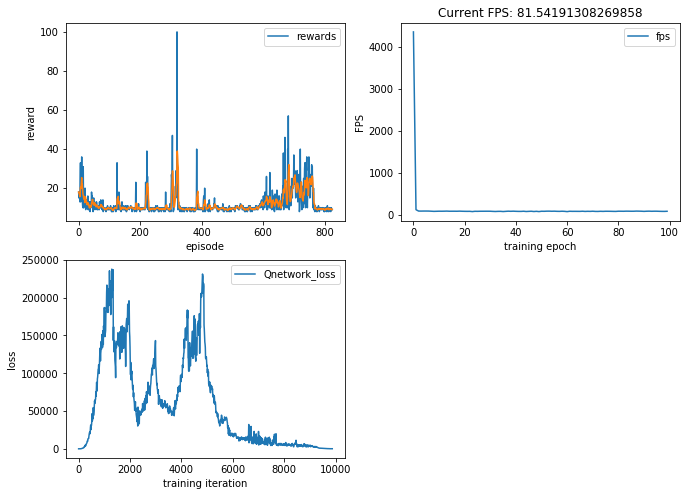

In [81]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [82]:
store_res("Quantile Regression Backwards DQN", agent)

# QR + Double

In [83]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": QuantileQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "quantiles": 51
}

In [84]:
agent = eGreedy(DoubleQAgent(QuantileQAgent(ReplayBufferAgent)))(config)

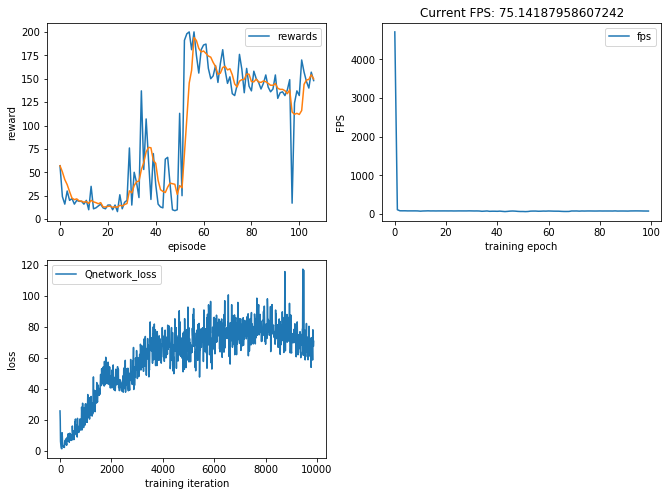

In [85]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [86]:
store_res("Quantile Regression Double DQN", agent)

# QR + Double + PrioritizedReplayBuffer

In [87]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": QuantileQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,    
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "quantiles": 51
}

In [88]:
agent = eGreedy(DoubleQAgent(QuantileQAgent(PrioritizedBufferAgent)))(config)

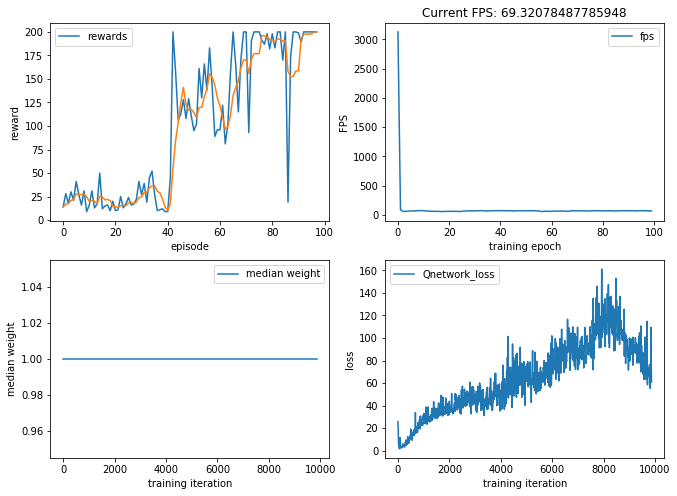

In [89]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [90]:
store_res("Quantile Regression Prioritized Double DQN", agent)

# QR + Double + PrioritizedReplayBuffer + Noisy

In [91]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": QuantileQnetwork,
    "Qnetwork_linear": NoisyLinear(std_init=0.4),
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "quantiles": 51
}

In [92]:
agent = DoubleQAgent(QuantileQAgent(PrioritizedBufferAgent))(config)

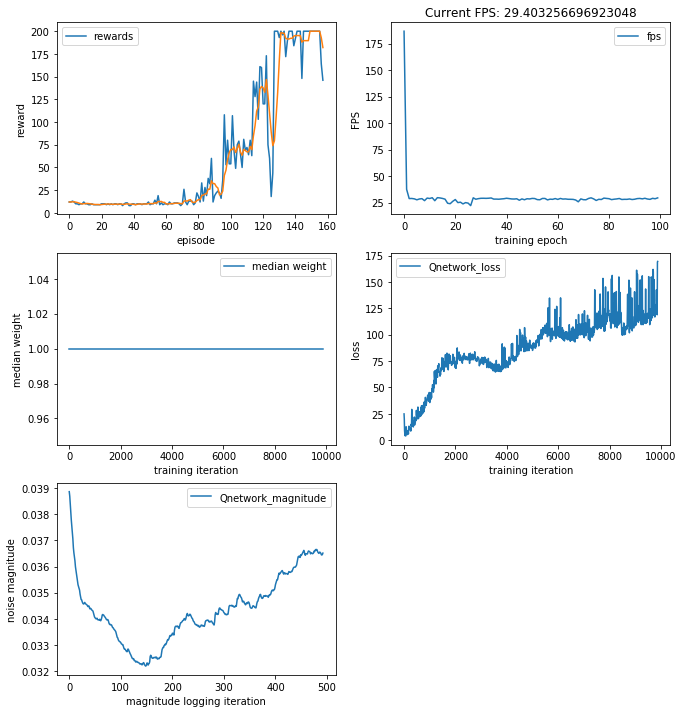

In [93]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [94]:
store_res("Noisy Quantile Regression Prioritized Double DQN", agent)

# Categorical + Double + PrioritizedReplayBuffer + Noisy + Dueling

In [102]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingQuantileQnetwork,
    "Qnetwork_linear": NoisyLinear(std_init=0.4),
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "quantiles": 51
}

In [103]:
agent = DoubleQAgent(QuantileQAgent(PrioritizedBufferAgent))(config)

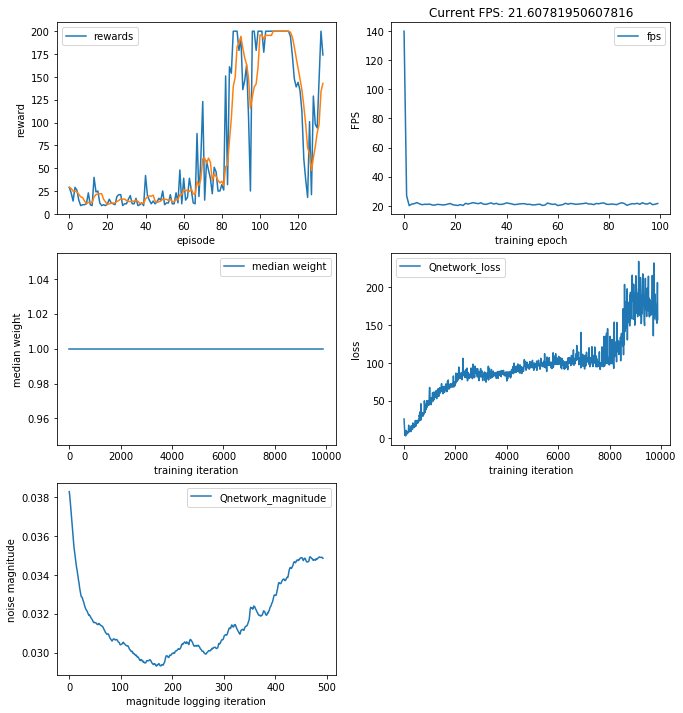

In [104]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [105]:
store_res("Noisy Quantile Regression Prioritized Dueling Double DQN", agent)

# QR Rainbow

In [106]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingQuantileQnetwork,
    "Qnetwork_linear": NoisyLinear(std_init=0.4),
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_nsteps": 2,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "quantiles": 51
}

In [107]:
agent = DoubleQAgent(QuantileQAgent(NstepReplay(PrioritizedBufferAgent)))(config)

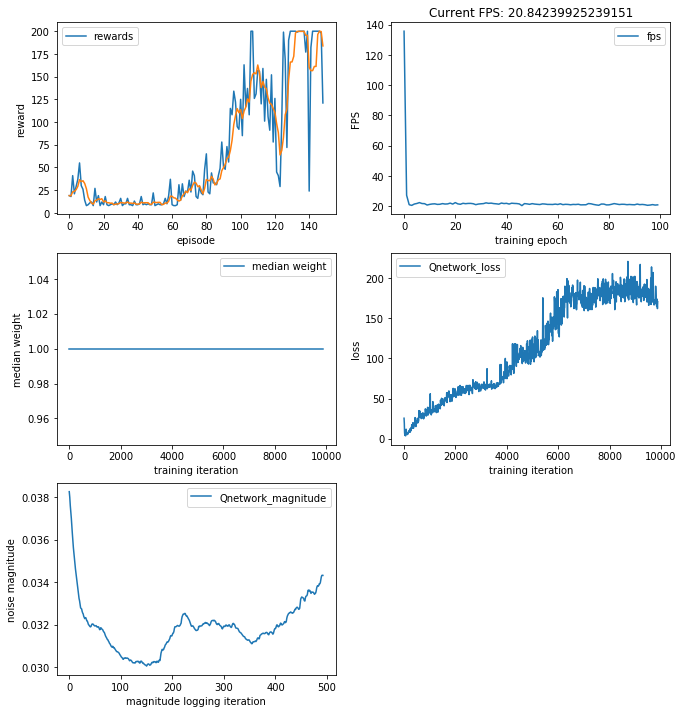

In [108]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [109]:
store_res("Quantile Regression Rainbow", agent)

# Preparing multithreading...

In [110]:
env.close()

In [111]:
def create_env():
    def _thunk():
        env = gym.make('CartPole-v0')
        return env
    return _thunk

# A2C

In [128]:
config = {
    "make_env": create_env,
    "threads": 8,
    "ActorCritic_FeatureExtractor": CartpoleNN,
    "ActorCriticHead": ActorCritic,
    "rollout": 5,
    "gamma": 0.99,
    "critic_loss_weight": 0.5,
    "entropy_loss_weight": 0.01
}

In [129]:
agent = A2C(Agent)(config)

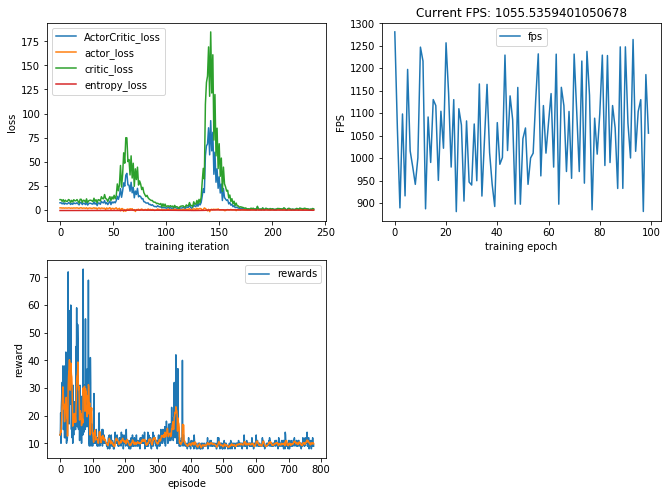

In [130]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [131]:
agent.env.close()
store_res("A2C", agent)

# GAE

In [132]:
config = {
    "make_env": create_env,
    "threads": 8,
    "ActorCritic_FeatureExtractor": CartpoleNN,
    "ActorCriticHead": ActorCritic,
    "rollout": 5,
    "gamma": 0.99,
    "gae_tau": 0.95,
    "critic_loss_weight": 0.5,
    "entropy_loss_weight": 0.01
}

In [133]:
agent = GAE(A2C(Agent))(config)

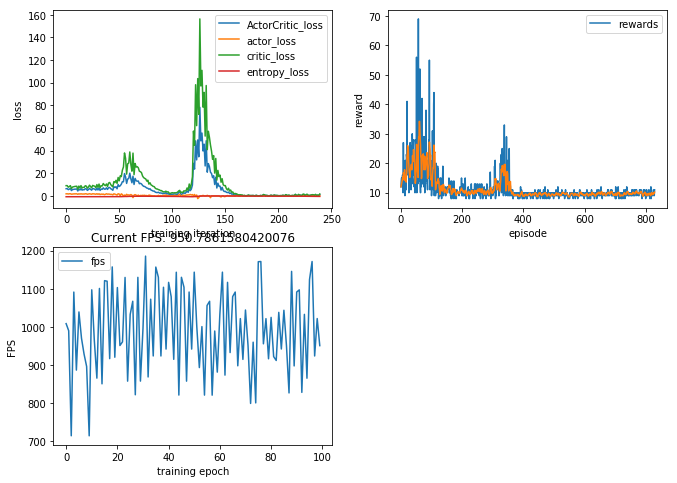

In [134]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [135]:
agent.env.close()
store_res("A2C with GAE", agent)

# PPO

In [136]:
config = {
    "make_env": create_env,
    "threads": 8,
    "ActorCritic_FeatureExtractor": CartpoleNN,
    "ActorCriticHead": ActorCritic,
    "rollout": 32,
    "ppo_clip": 0.1, 
    "epochs": 3, 
    "batch_size": 32,
    "gamma": 0.99,
    "critic_loss_weight": 0.5,
    "entropy_loss_weight": 0.01
}

In [137]:
agent = PPO(A2C(Agent))(config)

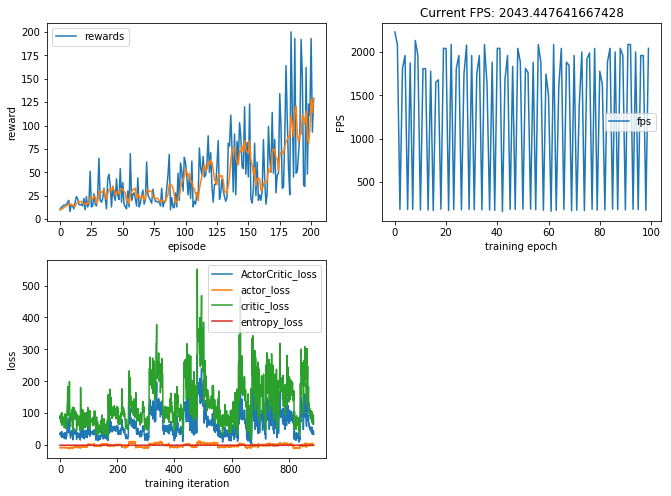

In [138]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [139]:
agent.env.close()
store_res("PPO", agent)

# PPO with GAE

In [140]:
config = {
    "make_env": create_env,
    "threads": 8,
    "ActorCritic_FeatureExtractor": CartpoleNN,
    "ActorCriticHead": ActorCritic,
    "rollout": 32,
    "ppo_clip": 0.1, 
    "epochs": 3, 
    "batch_size": 32,
    "gamma": 0.99,
    "gae_tau": 0.95,
    "critic_loss_weight": 0.5,
    "entropy_loss_weight": 0.01
}

In [141]:
agent = GAE(PPO(A2C(Agent)))(config)

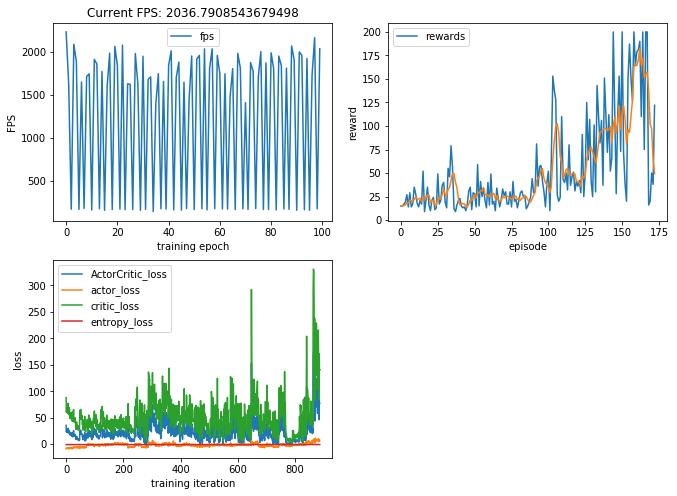

In [142]:
for i in range(100):
    agent.learn(100)
    plot_durations(agent, 5)    

plt.show()

In [143]:
agent.env.close()
store_res("PPO with GAE", agent)

# RESULTS

In [145]:
results

,Reached 200,Average reward,FPS
DQN,33.0,116.267441,101.529982
TwinDQN,57.0,71.136688,52.513482
Backwards DQN,31.0,132.773331,97.243041
Double DQN,23.0,126.166664,95.783212
Dueling Double DQN,27.0,121.777779,62.651599
Prioritized Double DQN,37.0,110.516853,85.584504
Noisy Double DQN,67.0,71.057144,31.814871
Noisy Prioritized Double DQN,94.0,67.344597,30.723975
Noisy Prioritized Dueling Double DQN,180.0,47.521740,22.563611
Categorical DQN,28.0,110.865166,74.947776


In [152]:
print(results.round(2).sort_values("Average reward", ascending=False).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Reached 200 &  Average reward &      FPS \\
\midrule
Categorical Backwards DQN                          &         32.0 &          134.95 &    74.02 \\
Backwards DQN                                      &         31.0 &          132.77 &    97.24 \\
Double DQN                                         &         23.0 &          126.17 &    95.78 \\
Dueling Double DQN                                 &         27.0 &          121.78 &    62.65 \\
DQN                                                &         33.0 &          116.27 &   101.53 \\
Categorical DQN                                    &         28.0 &          110.87 &    74.95 \\
Prioritized Double DQN                             &         37.0 &          110.52 &    85.58 \\
Categorical Prioritized Double DQN                 &         46.0 &          104.86 &    66.00 \\
Quantile Regression Prioritized Double DQN         &         42.0 &          100.76 &    68.62 \\
Categorical DQN with target 